In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import time

In [18]:
# ocean_data=xr.open_dataset("/Users/loganknudsen/Documents/UMD_Research_Local_File_Saves/psi_b_change_g_0.nc")
ocean_data=xr.open_dataset("/Users/loganknudsen/Documents/UMD_Research_Local_File_Saves/psi_b_change_short_run.nc")
u = ocean_data.u+ocean_data.U
v = ocean_data.v+ocean_data.V
b = ocean_data.b + ocean_data.B
# B = ocean_data.B
w = ocean_data.w

In [19]:
ocean_data.time

<xarray.DataArray 'time' (time: 3)>
array([             0,  6092721985540, 12185443971079], dtype='timedelta64[ns]')
Coordinates:
  * time     (time) timedelta64[ns] 00:00:00 ... 03:23:05.443971079
Attributes:
    longname:  Time

In [20]:
f = 2*(2*np.pi/(24*60*60))*np.sin(np.radians(45))
(ocean_data.time*10**(-8))*(f/2*np.pi)
# ocean_data.time

<xarray.DataArray 'time' (time: 3)>
array([ 0,  9, 19], dtype='timedelta64[ns]')
Coordinates:
  * time     (time) timedelta64[ns] 00:00:00 ... 03:23:05.443971079

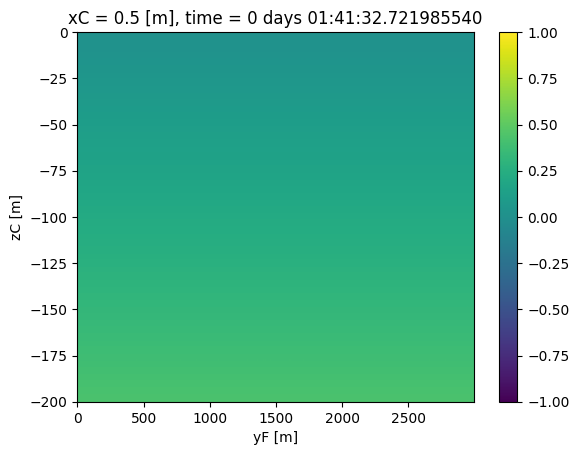

In [21]:
# vmin and vmax control colorbar range
# for i in range(len(ocean_data.time)):
# show timw -20, -25, -30, -35
q = 1
k = 0# order of magnitude
m = 1 # range number
v[q].plot(vmin=-m*10**(k),vmax=m*10**(k))
# xr.plot.contour(b[q,:,:,0],levels=10)
# plt.title("Small Pertubations w/0 Background")
plt.show()


b[1].plot()

In [12]:
t2 = 6
print(b[t2,-1,511,0])
print(b[0,-1,511,0])


<xarray.DataArray ()>
array(-0.00086017)
Coordinates:
    zC       float64 -0.5
    xC       float64 0.5
    yC       float64 1.499e+03
    time     timedelta64[ns] 10:09:16.331913238
<xarray.DataArray ()>
array(-0.00098039)
Coordinates:
    zC       float64 -0.5
    xC       float64 0.5
    yC       float64 1.499e+03
    time     timedelta64[ns] 00:00:00


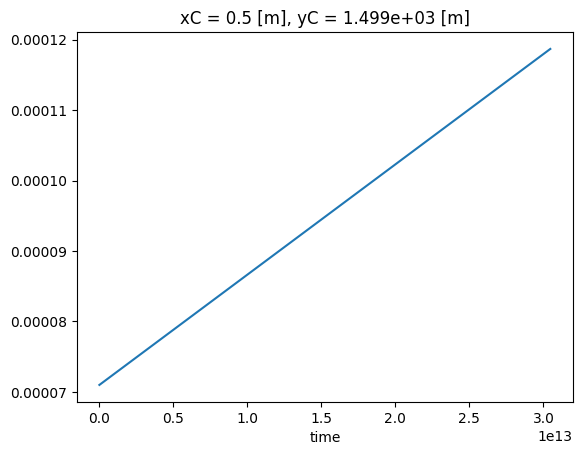

In [23]:
time = -1
((b[:,time,511,0]-b[:,time-1,511,0])/(1)).plot()

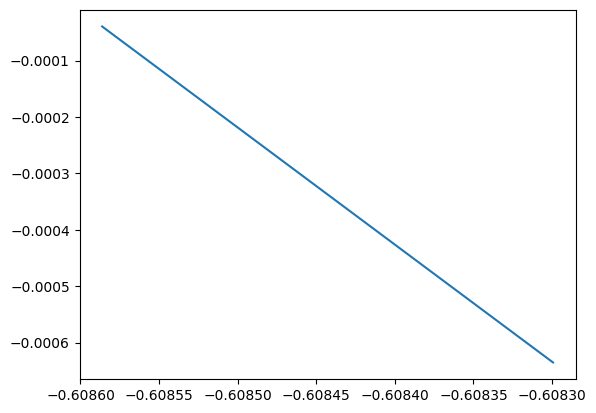

In [24]:
plt.plot(u[:,100,511,0],v[:,100,511,0])

In [ ]:
59000/((2*np.pi)/(10**(-4)))

0.9390141642421826

In [ ]:
81.7*10**(-4)

0.00817